In [0]:
#manipulating data
import pandas as pd 
import numpy as np
#for data and arrays
from numpy import array
from numpy import inf
#will decompose the matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from google.colab import files
uploaded=files.upload()

Saving train_data.csv to train_data (3).csv


In [0]:
data=pd.read_csv('train_data.csv')
data.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

In [0]:
#data.replace({"NA":np.nan})
data.fillna(0,inplace =True)
data.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

We replaced the NA values with the fillna command to account for the missing values.

In [0]:
#nominal = ['id', 'MSSubClass', 'MSZoning', 'Street', 'Alley', 'Utilities', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'GarageYrBlt', 'PavedDrive', 'MiscFeature', 'YrSold', 'SaleType']
nominal = ['MSZoning', 'Street', 'Alley', 'Utilities', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',  'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'PavedDrive', 'MiscFeature', 'SaleType']
ordinal = ['LotShape','LandContour','LandSlope','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','FireplaceQu','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','SaleCondition']
numerical=['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','OverallQual','OverallCond']
target=['SalePrice']

categorical_data = data.select_dtypes(include=['object']).copy()
#categorical_data
column_names=list(categorical_data.columns)
#column_names

for feature in column_names:
  categorical_data[feature]=categorical_data[feature].astype('category')

for feature in ordinal:
  categorical_data[feature]=categorical_data[feature].cat.codes
categorical_data.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,0,3,3,AllPub,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,2,4,PConc,3,4,4,3,6,GasA,0,Y,SBrkr,2,Typ,0,Attchd,2,5,5,Y,0,0,0,WD,4
1,RL,Pave,0,3,3,AllPub,FR2,0,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,3,4,CBlock,3,4,2,1,6,GasA,0,Y,SBrkr,3,Typ,5,Attchd,2,5,5,Y,0,0,0,WD,4
2,RL,Pave,0,0,3,AllPub,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,2,4,PConc,3,4,3,3,6,GasA,0,Y,SBrkr,2,Typ,5,Attchd,2,5,5,Y,0,0,0,WD,4
3,RL,Pave,0,0,3,AllPub,Corner,0,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,3,4,BrkTil,4,2,4,1,6,GasA,2,Y,SBrkr,2,Typ,3,Detchd,3,5,5,Y,0,0,0,WD,0
4,RL,Pave,0,0,3,AllPub,FR2,0,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,2,4,PConc,3,4,1,3,6,GasA,0,Y,SBrkr,2,Typ,5,Attchd,2,5,5,Y,0,0,0,WD,4


In [0]:

data_copy=categorical_data.copy()
data_copy = pd.concat([pd.get_dummies(data_copy[nominal]),data_copy],axis=1) 
data_copy.drop(nominal,axis=1,inplace=True)

#data_copy
new_data = pd.concat([data_copy,data[numerical],data[target]],axis=1)
new_data

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_0,Alley_Grvl,Alley_Pave,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,...,KitchenQual,FireplaceQu,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,SaleCondition,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,OverallQual,OverallCond,SalePrice
0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,0,2,5,5,0,0,4,65.0,8450,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,7,5,208500
1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3,5,2,5,5,0,0,4,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,6,8,181500
2,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,5,2,5,5,0,0,4,68.0,11250,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,7,5,223500
3,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,3,3,5,5,0,0,0,60.0,9550,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,7,5,140000
4,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,2,5,2,5,5,0,0,4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,8,5,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3,5,2,5,5,0,0,4,62.0,7917,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,2,460,0,40,0,0,0,0,0,8,6,5,175000
1456,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,3,5,3,5,5,0,3,4,85.0,13175,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,2,500,349,0,0,0,0,0,0,2,6,6,210000
1457,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,3,2,5,5,0,1,4,66.0,9042,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1,252,0,60,0,0,0,0,2500,5,7,9,266500
1458,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,2,0,3,5,5,0,0,4,68.0,9717,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1,240,366,0,112,0,0,0,0,4,5,6,142125


In [0]:
all_features=list(new_data.columns)
X = new_data.loc[:,all_features].values
y = new_data.loc[:,["SalePrice"]].values
#y
X

array([[0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 7.00000e+00,
        5.00000e+00, 2.08500e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 6.00000e+00,
        8.00000e+00, 1.81500e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 7.00000e+00,
        5.00000e+00, 2.23500e+05],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 7.00000e+00,
        9.00000e+00, 2.66500e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 5.00000e+00,
        6.00000e+00, 1.42125e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 5.00000e+00,
        6.00000e+00, 1.47500e+05]])

In [0]:
#how to stabdadise data
X = StandardScaler().fit_transform(X)

In [0]:
pca = PCA(n_components=2)
pc_s=pca.fit_transform(X)
pca_data = pd.DataFrame(pc_s, columns=['PC1','PC2'])
final_data=pd.concat([pca_data, data[target]], axis=1)
#pca_data
final_data

,PC1,PC2,SalePrice
0,2.856419,1.203414,208500
1,-0.073343,-2.866939,181500
2,3.559889,0.917684,223500
3,-1.434369,0.847255,140000
4,5.744365,1.323153,250000
...,...,...,...
1455,1.737565,1.821630,175000
1456,1.552273,-4.456403,210000
1457,1.230347,1.989572,266500
1458,-2.886500,-3.231753,142125


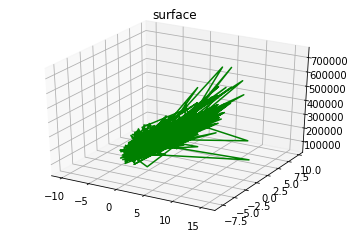

In [0]:
# Y = final_data['SalePrice']
# Y=np.expand_dims(Y,axis=0)
Z = final_data['SalePrice']
Z=np.expand_dims(Z,axis=0)
# print(X.shape)
# print(Y.shape)
# print(Z.shape)

fig = plt.figure()
ax = plt.axes(projection='3d')
#ax.plot_surface(final_data['PC1'], final_data['PC2'], Z, rstride=1, cstride=1,cmap='viridis', edgecolor='none')
ax.plot_wireframe(final_data['PC1'], final_data['PC2'], Z,color='green')
ax.set_title('surface');
plt.show()


In [0]:
pca.explained_variance_ratio_

array([0.06140054, 0.0320965 ])

In [0]:
X=final_data.drop("SalePrice",1)
y=final_data["SalePrice"]
regressor=LassoCV()
regressor.fit(X,y)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)